In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
X=6* np.random.rand(200,1)-3
Y=0.8 * X**2 + 0.9*X + 2 + np.random.randn(200,1)

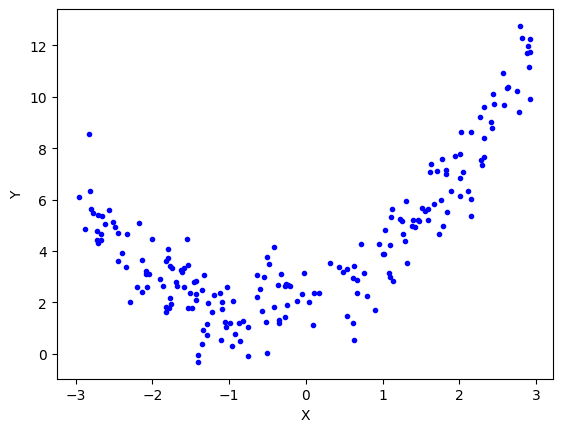

In [ ]:
plt.plot(X,Y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.3272788759845584

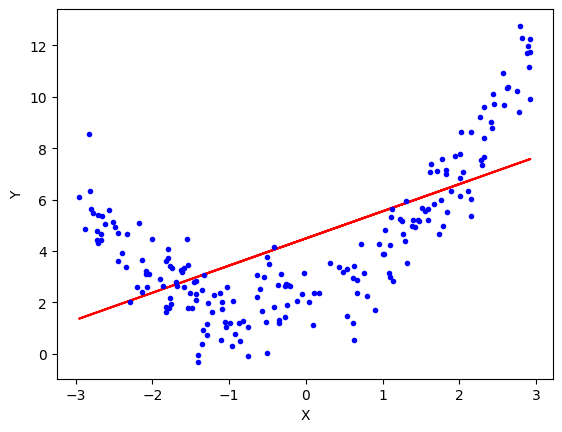

In [ ]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(X,Y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# **APPLYING POLYNOMIAL LINEAR REGRESSION  OF DEGREE-2**

In [ ]:
poly=PolynomialFeatures(degree=2)
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.fit_transform(x_test)

In [ ]:
print(x_train[0])
print(x_train_trans[0])

[-1.35952073]
[ 1.         -1.35952073  1.84829661]


In [ ]:
lr=LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test_trans)
r2_score(y_test,y_pred)

0.8191120034847837

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.97641798 0.79574445]]
[2.01604139]


In [ ]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)


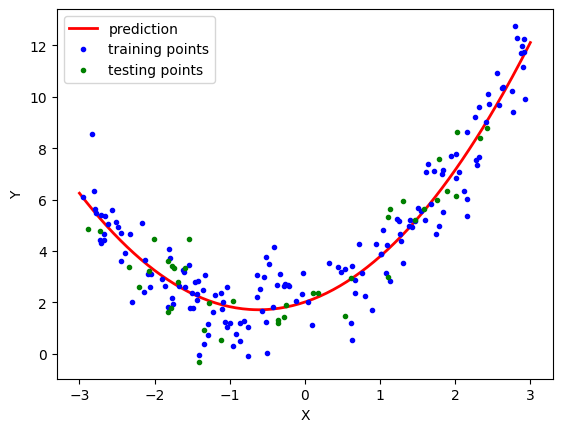

In [ ]:
plt.plot(X_new,y_new,'r-',linewidth=2,label='prediction')
plt.plot(x_train,y_train,'b.',label='training points')
plt.plot(x_test,y_test,'g.',label='testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, Y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()


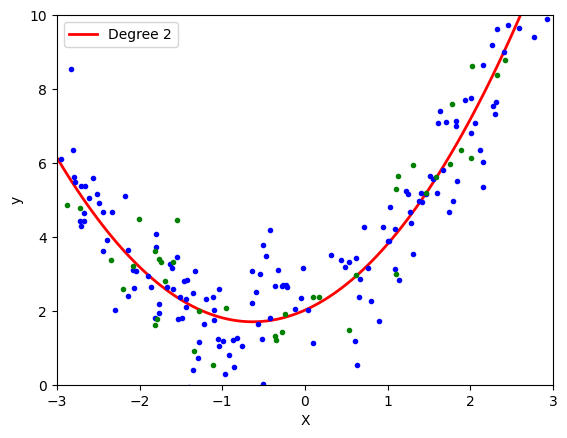

In [ ]:
polynomial_regression(2)